# 46-932, Simulation Methods for Option Pricing: Homework 2

*Author*: Jordan Giebas <br>
*Due Date*: Feb. 1, 2018

## Question 1

Find the Cholesky decomposition of the following matrix, i.e. a matrix that satisfies 
$$ AA^{T} = \bigg[\begin{smallmatrix} 1 & \rho  & \rho^{2} \\ 
                             \rho &  1    & \rho \\
                         \rho^{2} &  \rho & 1 \\
                             \end{smallmatrix}\bigg] = \Sigma$$
                             
                             
Assume matrix $A$ has lower triangular form as follows,

$$ A = \bigg[\begin{smallmatrix} a &  0 & 0 \\ 
                                 b &  c & 0 \\
                                 d &  e & f\\
                             \end{smallmatrix}\bigg]$$
                             
Therefore, 

$$ A^{T} = \bigg[\begin{smallmatrix} a &  b & d \\ 
                                     0 &  c & e \\
                                     0 &  0 & f\\
                                     \end{smallmatrix}\bigg]$$
                                     
Then, writing explicitly $AA^{T}$ and setting equal to $\Sigma$

$$ AA^{T} = \bigg[\begin{smallmatrix} a^2 &  ab & ad \\ 
                                      ab &  b^2+c^2 & bd+ce \\
                                      ad &  bd+ce & d^2+e^2+f^2\\
                                      \end{smallmatrix}\bigg] = 
                   \bigg[\begin{smallmatrix} 1 & \rho  & \rho^{2} \\ 
                             \rho &  1    & \rho \\
                         \rho^{2} &  \rho & 1 \\
                             \end{smallmatrix}\bigg]$$
                             
                             
Solving this system, we find that $\big(a,b,c,d,e,f\big) = \big(1,\rho, \sqrt{1-\rho^{2}}, \rho^{2}, \rho\sqrt{1-\rho^{2}},\sqrt{1-\rho^{2}}\big)$ (This can be confirmed by plugging in and performing the matrix multiplication to retrieve $\Sigma$. <br>

In order to generate trivariate normals with a particular correlation, can do the following. Generate three standard normals and put them into a vector: $\vec{Z} = \big(Z_{1},Z_{2},Z_{3}\big)^{T}$ where $Z_{i} \sim N(0,1), \forall i$.
Then, multiply the matrix $A$ defined above by the vector $\vec{Z}$. The resulting vector $\vec{X} \in \mathbb{R}^{3x1}$ will be trivariate normal with the specified correlation.

## Question 2

In [6]:
"""
Some useful functions, and importing 
some modules for this question
"""

# Use numpy's normal RV generator
import numpy as np
import pylab 
import scipy.stats as stats
import math
from math import sqrt, exp, pi, fabs, log
import matplotlib

# How to plot normal plots
def get_plt(data):
    
    stats.probplot(data, dist="norm", plot=pylab)
    pylab

"""
Function:
generate exponentially distributed random numbers
using the probability integral transform,
this is specifically for lambda = 1 exp RVs
"""
def exp_rv_lam1():
    
    return -1.0*log(np.random.uniform())
    



### Part (a)
Use the rejection method based on the unit exponential distribution (from class)

This is for n = 100


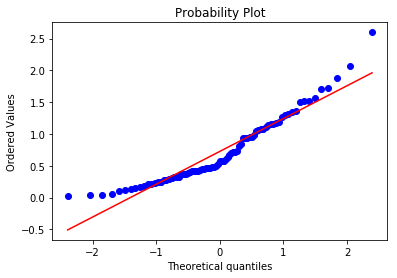

In [7]:
# Constant C is a global var
C = sqrt(2*exp(1)/pi)

# Define g(x) function
def g_fn( x ):
    
    return ( ((1/sqrt(2*pi))*exp(-0.5*(x**2)))/(0.5*C*exp(-1.0*fabs(x))) )


print("This is for n = 100")    
x_list = list()
for i in range(100):
    
    y = -1.0*log(np.random.uniform())
    if (np.random.uniform() <= g_fn(y)):
        x_list.append(y)

get_plt(x_list)



This is for n = 1000


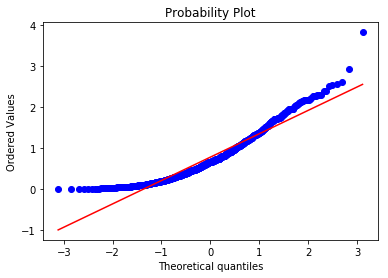

In [8]:
print("This is for n = 1000")    
x_list = list()
for i in range(1000):
    
    y = -1.0*log(np.random.uniform())
    if (np.random.uniform() <= g_fn(y)):
        x_list.append(y)

get_plt(x_list)



This is for n = 10000


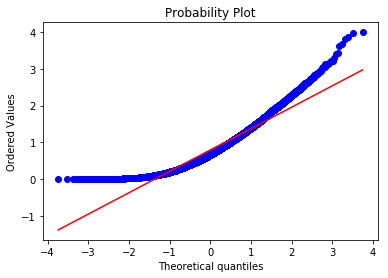

In [9]:
print("This is for n = 10000")    
x_list = list()
for i in range(10000):
    
    y = -1.0*log(np.random.uniform())
    if (np.random.uniform() <= g_fn(y)):
        x_list.append(y)

get_plt(x_list)


**COMMENTS HERE FOR PART(A)**

### Part (b)
Use the generalized lambda distribution with $\lambda_{1}=0, \lambda_{2}=0.1975, \lambda_{3}=\lambda_{4}=0.1349$

This is for n = 100


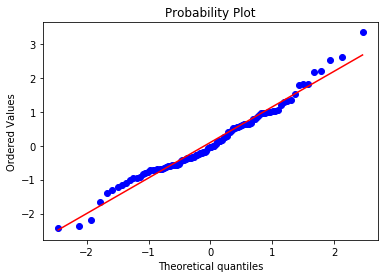

In [10]:
# Not even close to sure if this is correct

def f_inv( var ):
    
    u = np.random.uniform()
    return ( var[0] + ((1/var[1])*(u**var[2] - (1-u)**var[3])) )


print("This is for n = 100")
# Define parameters
vec = [0,0.1975,0.1349,0.1349]

x_list_2 = [f_inv(vec) for i in range(100)]
get_plt(x_list_2)





In [11]:
2**1.5

2.8284271247461903

This is for n = 1000


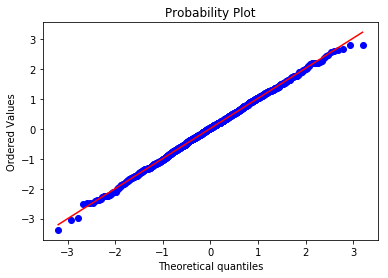

In [12]:
print("This is for n = 1000")
# Define parameters
vec = [0,0.1975,0.1349,0.1349]

x_list_2 = [f_inv(vec) for i in range(1000)]
get_plt(x_list_2)

This is for n = 10000


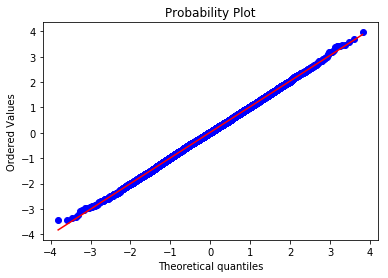

In [13]:
print("This is for n = 10000")
# Define parameters
vec = [0,0.1975,0.1349,0.1349]

x_list_2 = [f_inv(vec) for i in range(10000)]
get_plt(x_list_2)

### Part (c)
Use the "GS weighted normal" distribution

This is for n = 100


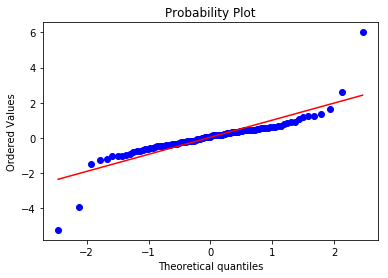

In [14]:
# Define parameters to Litterman, Winkelmann (GS) normal mixture
p   = 0.82
w_1 = 0.60
w_2 = 1.98

# Define the mixture
def gs():
    
    u = np.random.uniform()
    if u < p:
        return w_1*np.random.normal()
    else:
        return w_2*np.random.normal()


# Plot the results
print("This is for n = 100")

x_list_3 = [gs() for i in range(100)]
get_plt(x_list_3)



This is for n = 1000


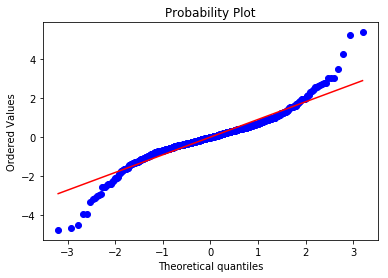

In [15]:
# Plot the results
print("This is for n = 1000")

x_list_3 = [gs() for i in range(1000)]
get_plt(x_list_3)

This is for n = 10000


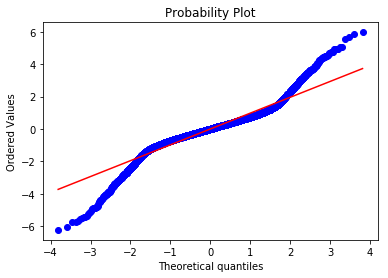

In [16]:
# Plot the results
print("This is for n = 10000")

x_list_3 = [gs() for i in range(10000)]
get_plt(x_list_3)

## Question 3

### Part (a)
Generate 1,000 bivariate random vars from a standard bivariate normal distribution with correlations = 0, 0.4, and 0.8 

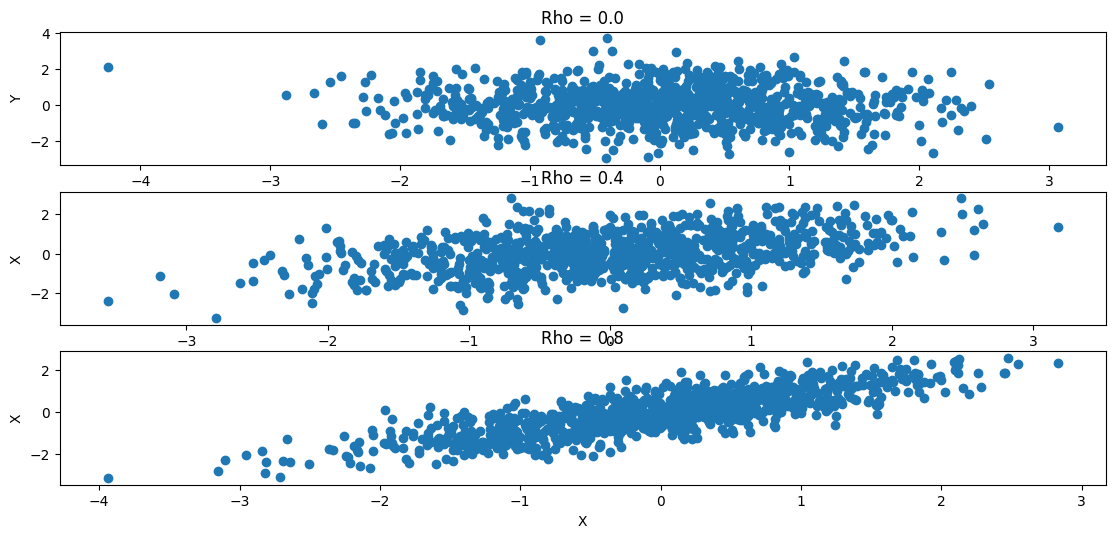

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(13.5, 6.0), dpi=100)

x_list = list()
y_list = list()

def bivariate_normal( rho ):
    
    cov_mat = np.array([[1, rho],[rho, 1]])
    A = np.linalg.cholesky(cov_mat)
    
    x_vec = A.dot(np.random.normal(size=2))
    
    return x_vec[0], x_vec[1]


# Case 1
rho = 0.0
for i in range(1000):
    x, y = bivariate_normal(rho)
    x_list.append(x)
    y_list.append(y)

ax1 = fig.add_subplot(311)
ax1.title.set_text('Rho = 0.0')
plt.xlabel("X")
plt.ylabel("Y")
ax1.scatter(x_list,y_list)

# Case 2
x_list.clear()
y_list.clear()

rho = 0.4
for i in range(1000):
    x, y = bivariate_normal(rho)
    x_list.append(x)
    y_list.append(y)

ax2 = fig.add_subplot(312)
ax2.title.set_text('Rho = 0.4')
plt.xlabel("X")
plt.ylabel("X")
ax2.scatter(x_list,y_list)

# Case 3
x_list.clear()
y_list.clear()

rho = 0.8
for i in range(1000):
    x, y = bivariate_normal(rho)
    x_list.append(x)
    y_list.append(y)

ax3 = fig.add_subplot(313)
ax3.title.set_text('Rho = 0.8')
plt.xlabel("X")
plt.ylabel("X")
ax3.scatter(x_list,y_list)



### Part (b)

Generate 1,000 bivariate random vars from a standard t(5) distribution with correlations = 0, 0.4, and 0.8 

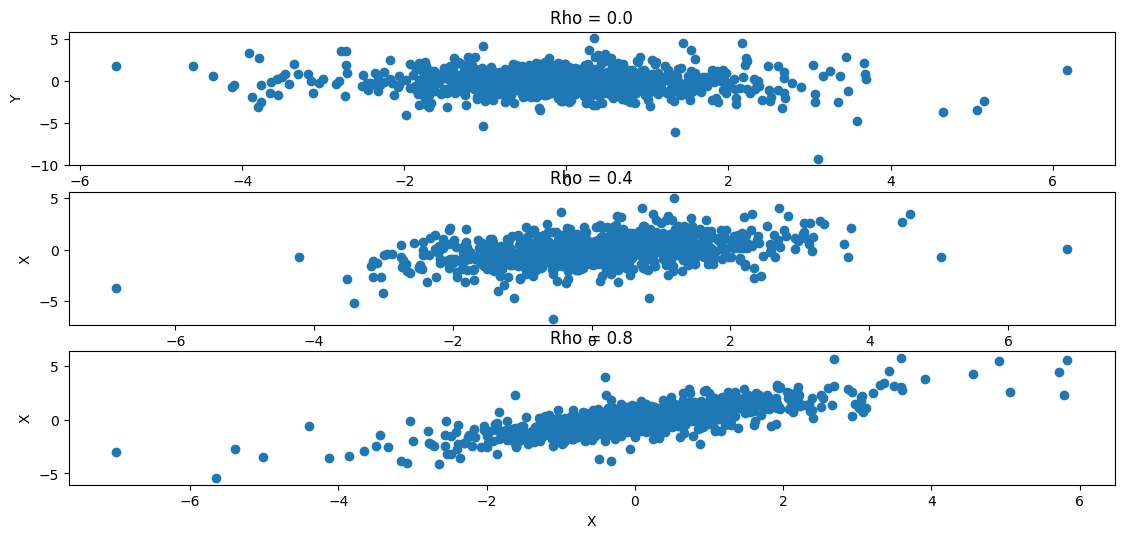

In [18]:
fig = plt.figure(figsize=(13.5, 6.0), dpi=100)

# Similar as above, but needed 
def bivariate_normal_2( rho ):
    
    cov_mat = np.array([[1, rho],[rho, 1]])
    A = np.linalg.cholesky(cov_mat)
    x_vec = A.dot(np.random.normal(size=2))
    
    return x_vec


def student_t(rho, df):

    T = np.sqrt(df/np.random.chisquare(df))*bivariate_normal_2(rho)
    return T[0], T[1]
    
    
# Global for all cases
nu_ = 5
    
# Case 1
x_list = list()
y_list = list()

rho = 0.0
for i in range(1000):
    x, y = student_t(rho, nu_)
    x_list.append(x)
    y_list.append(y)

ax1 = fig.add_subplot(311)
ax1.title.set_text('Rho = 0.0')
plt.xlabel("X")
plt.ylabel("Y")
ax1.scatter(x_list,y_list)

# Case 2
x_list = list()
y_list = list()

rho = 0.4
for i in range(1000):
    x, y = student_t(rho, nu_)
    x_list.append(x)
    y_list.append(y)

ax2 = fig.add_subplot(312)
ax2.title.set_text('Rho = 0.4')
plt.xlabel("X")
plt.ylabel("X")
ax2.scatter(x_list,y_list)

# Case 3
x_list = list()
y_list = list()

rho = 0.8
for i in range(1000):
    x, y = student_t(rho, nu_)
    x_list.append(x)
    y_list.append(y)

ax3 = fig.add_subplot(313)
ax3.title.set_text('Rho = 0.8')
plt.xlabel("X")
plt.ylabel("X")
ax3.scatter(x_list,y_list)

**Note:** In the t-distribution above, the tails are much heavier as desired. The extremeties reach from approximately -30 to 40 whereas in the normal case the extremes were above a tenth of that (-3,4).

### Part (c)

Generate 1,000 bivariate random vars where each marginal follows a exponential(1) distribution, using standard gaussian copula with correlation 0.0, 0.4, 0.8

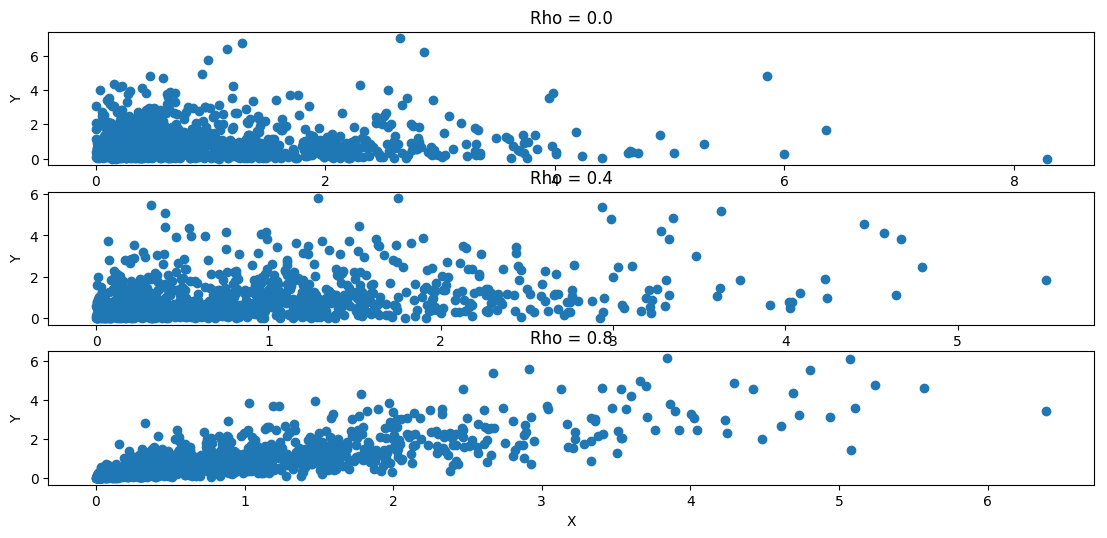

In [19]:
import scipy
from scipy.stats import norm

## Gaussian Copula
## Use the bivariate_normal_2 to generate the Y, in Y = AZ

fig = plt.figure(figsize=(13.5, 6.0), dpi=100)

x_list = list()
y_list = list()

"""
Case 1
"""
rho = 0.0
for i in range(1000):
    
    x, y = bivariate_normal(rho)
    x_list.append(x)
    y_list.append(y)
    
# Define the lists as np.arrays to perform
# element-wise scalar division
x_list = np.array(x_list)
y_list = np.array(y_list)
    
# Perform the scaling
x_list /= np.std(x_list)
y_list /= np.std(y_list)

# Apply the cdf 
x_list = norm.cdf(x_list)
y_list = norm.cdf(y_list)

# Perform PIT for exponential(1) to make all marginal
x_list = -1.0*np.log(x_list)
y_list = -1.0*np.log(y_list)

# Plot
ax1 = fig.add_subplot(311)
ax1.title.set_text('Rho = 0.0')
plt.xlabel("X")
plt.ylabel("Y")
ax1.scatter(x_list,y_list)

"""
Case 2
"""
x_list = list()
y_list = list()

rho = 0.4
for i in range(1000):
    
    x, y = bivariate_normal(rho)
    x_list.append(x)
    y_list.append(y)
    
# Define the lists as np.arrays to perform
# element-wise scalar division
x_list = np.array(x_list)
y_list = np.array(y_list)
    
# Perform the scaling
x_list /= np.std(x_list)
y_list /= np.std(y_list)

# Apply the cdf 
x_list = norm.cdf(x_list)
y_list = norm.cdf(y_list)

# Perform PIT for exponential(1) to make all marginal
x_list = -1.0*np.log(x_list)
y_list = -1.0*np.log(y_list)

# Plot
ax1 = fig.add_subplot(312)
ax1.title.set_text('Rho = 0.4')
plt.xlabel("X")
plt.ylabel("Y")
ax1.scatter(x_list,y_list)

"""
Case 2
"""
x_list = list()
y_list = list()

rho = 0.8
for i in range(1000):
    
    x, y = bivariate_normal(rho)
    x_list.append(x)
    y_list.append(y)
    
# Define the lists as np.arrays to perform
# element-wise scalar division
x_list = np.array(x_list)
y_list = np.array(y_list)
    
# Perform the scaling
x_list /= np.std(x_list)
y_list /= np.std(y_list)

# Apply the cdf 
x_list = norm.cdf(x_list)
y_list = norm.cdf(y_list)

# Perform PIT for exponential(1) to make all marginal
x_list = -1.0*np.log(x_list)
y_list = -1.0*np.log(y_list)

# Plot
ax1 = fig.add_subplot(313)
ax1.title.set_text('Rho = 0.8')
plt.xlabel("X")
plt.ylabel("Y")
ax1.scatter(x_list,y_list)



### Part (d)

Generate 1,000 bivariate random vars where each marginal follows a exponential(1) distribution, using standard t-5 copula with correlation 0.0, 0.4, 0.8

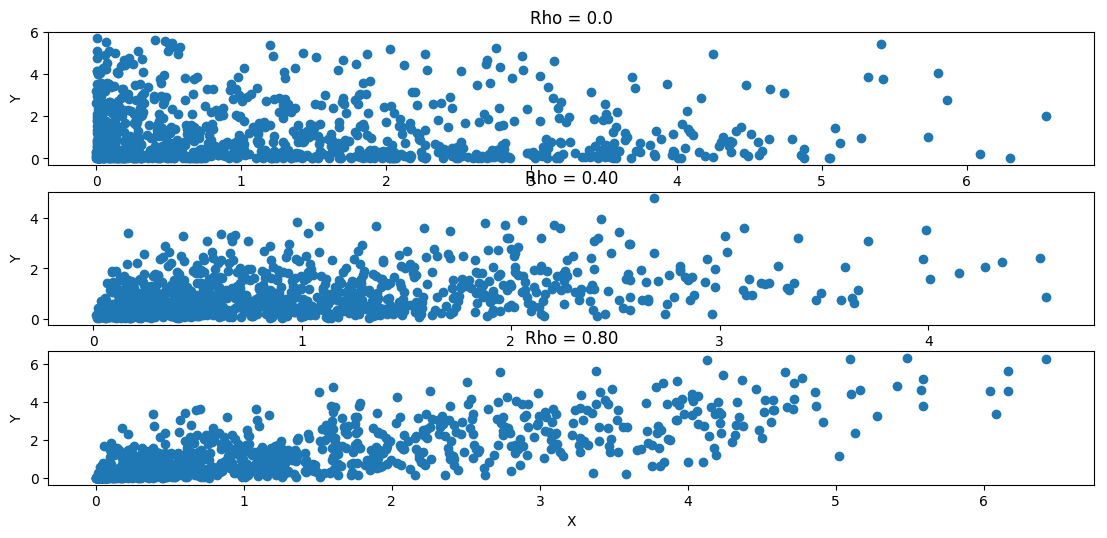

In [20]:
import scipy
from scipy.stats import t

fig = plt.figure(figsize=(13.5, 6.0), dpi=100)

x_list = list()
y_list = list()

"""
Case 1
"""
rho = 0.0
for i in range(1000):
    
    x, y = bivariate_normal(rho)
    x_list.append(x)
    y_list.append(y)
    
# Define the lists as np.arrays to perform
# element-wise scalar division
x_list = np.array(x_list)
y_list = np.array(y_list)

# Get the std of the lists before mutating
x_std = np.std(x_list)
y_std = np.std(y_list)

# Scale them by the chi-squared RV
S = np.random.chisquare(5)
x_list *= np.sqrt(5/S)
y_list *= np.sqrt(5/S)

# Perform the scaling
x_list /= x_std
y_list /= y_std

# Apply the cdf 
x_list = t.cdf(x_list, 5)
y_list = t.cdf(y_list, 5)

# Perform PIT for exponential(1) to make all marginal
x_list = -1.0*np.log(x_list)
y_list = -1.0*np.log(y_list)

# Plot
ax1 = fig.add_subplot(311)
ax1.title.set_text('Rho = 0.0')
plt.xlabel("X")
plt.ylabel("Y")
ax1.scatter(x_list,y_list)


"""
Case 2
"""
x_list = list()
y_list = list()

rho = 0.40
for i in range(1000):
    
    x, y = bivariate_normal(rho)
    x_list.append(x)
    y_list.append(y)
    
# Define the lists as np.arrays to perform
# element-wise scalar division
x_list = np.array(x_list)
y_list = np.array(y_list)

# Get the std of the lists before mutating
x_std = np.std(x_list)
y_std = np.std(y_list)

# Scale them by the chi-squared RV
S = np.random.chisquare(5)
x_list *= np.sqrt(5/S)
y_list *= np.sqrt(5/S)

# Perform the scaling
x_list /= x_std
y_list /= y_std

# Apply the cdf 
x_list = t.cdf(x_list, 5)
y_list = t.cdf(y_list, 5)

# Perform PIT for exponential(1) to make all marginal
x_list = -1.0*np.log(x_list)
y_list = -1.0*np.log(y_list)

# Plot
ax1 = fig.add_subplot(312)
ax1.title.set_text('Rho = 0.40')
plt.xlabel("X")
plt.ylabel("Y")
ax1.scatter(x_list,y_list)

"""
Case 3
"""
x_list = list()
y_list = list()

rho = 0.80
for i in range(1000):
    
    x, y = bivariate_normal(rho)
    x_list.append(x)
    y_list.append(y)
    
# Define the lists as np.arrays to perform
# element-wise scalar division
x_list = np.array(x_list)
y_list = np.array(y_list)

# Get the std of the lists before mutating
x_std = np.std(x_list)
y_std = np.std(y_list)

# Scale them by the chi-squared RV
S = np.random.chisquare(5)
x_list *= np.sqrt(5/S)
y_list *= np.sqrt(5/S)

# Perform the scaling
x_list /= x_std
y_list /= y_std

# Apply the cdf 
x_list = t.cdf(x_list, 5)
y_list = t.cdf(y_list, 5)

# Perform PIT for exponential(1) to make all marginal
x_list = -1.0*np.log(x_list)
y_list = -1.0*np.log(y_list)

# Plot
ax1 = fig.add_subplot(313)
ax1.title.set_text('Rho = 0.80')
plt.xlabel("X")
plt.ylabel("Y")
ax1.scatter(x_list,y_list)




## Question 4

### Part (a)

What is the smallest value of $C_{n}$ such that $0 < g(x) \leq 1$? 

We search for this by identifying the maximum and minimum of $g(x)$. 

$$g(x)=\frac{1}{C_n}\frac{f_n(x)}{f_1(x)}=\frac{1}{C_n}\frac{\frac{\Gamma(\frac{n+1}{2})}{\sqrt{n\pi}\Gamma(\frac{n}{2})} \bigg(1+\frac{x^2}{n}\bigg)^{-\frac{(n+1)}{2}}}{\frac{\Gamma(1)}{\sqrt{\pi}\Gamma(\frac{1}{2})} \bigg(1+x^2\bigg)^{-1}}$$

Using $\Gamma(1) = 1$, $\Gamma(\frac{1}{2}) = \sqrt{\pi}$, and some basic algebra, we find that we may write,

$$g(x)=\frac{1}{C_n}\bigg[\sqrt{\frac{\pi}{n}}\frac{\Gamma(\frac{n+1}{2})}{\Gamma(\frac{n}{2})}\bigg]\bigg[\bigg(1+\frac{x^2}{n}\bigg)^{-\frac{(n+1)}{2}}\bigg(1+x^2\bigg)\bigg]$$

Define $h(x)=\bigg(1+\frac{x^2}{n}\bigg)^{-\frac{(n+1)}{2}}\bigg(1+x^2\bigg)$. We need to choose $C_{n}$ such that $g(x)$ is bounded between $0$ and $1$, therefore we need to know where the extrema of $h(x)$ occur. After taking the derivative of $h(x)$ and setting equal to $0$, the extrema are occur at $x=0,\pm 1$. We recognize that $h(x)$ is even, hence $h(-1) = h(1)$. Also $h(1) > h(0)$, and so it follows that the maximum occurs at $x=\pm 1$. $h(1) = 2\big(1+\frac{1}{n})^{-1}$. Hence, we $C_{n} = \sqrt{\frac{\pi}{n}}\frac{\Gamma(\frac{n+1}{2})}{\Gamma(\frac{n}{2})}2\big(1+\frac{1}{n})^{-1}$. This is the smallest value such that $g(x)$ is guarenteed to be bounded by $[0,1]$.
<br>
**Note:** <br>
As mentioned, clearly $C_{1}$ should be $1$. We see this follows by choosing $n=1$, and plugging into the above expression for $C_{n}$

### Part (b)

Compute $C_{2}, C_{3}, C_{5}, C_{\infty}$

Below, I write a function to compute $C_{n}$ for $n \in \mathbb{N}$.

In [21]:
import numpy as np
import scipy.special as ss


def c_n( n ):
    
    return ( 2*(np.sqrt(np.pi/float(n))*(ss.gamma((n+1)/2.0)/ss.gamma(n/2.0)))/(1+(1/float(n))) )
    
    
for n_ in [2,3,5]:
    
    outstr = "C_" + str(n_) + ": "
    print(outstr, c_n(n_))

C_2:  1.48096097939
C_3:  1.73205080757
C_5:  1.98761598


For the $C_{\infty}$ case, we use the fact that the t-distribution approaches the normal distribution as the degrees of freedom tends toward infinity. We solve in a similar fashion,

$$g(x)=\frac{1}{C_{\infty}}\frac{\phi(x)}{f_1(x)}=\frac{1}{C_{\infty}}\frac{\frac{1}{\sqrt{2\pi}}exp\big(-0.5*x^2\big)}{\frac{\Gamma(1)\big(1+x^2\big)^{-1}}{\sqrt{\pi}\Gamma(\frac{1}{2})}}=\frac{1}{C_{\infty}}\sqrt{\frac{\pi}{2}}e^{-\frac{1}{2}x^2}\big(1+x^2\big)$$

By a similar process as above, we find that the maximum value of $e^{\frac{-1}{2}x^2}\big(1+x^2\big)$ is at $1$. Hence, we choose $C_{\infty} = \sqrt{2\pi}e^{-\frac{1}{2}}$. 


In [22]:
print("C_\infty: ", np.sqrt(2.0*np.pi)*np.exp(-.50))

C_\infty:  1.52034690107


### Part (c) 

Use the rejection algorithm to generate $m$ observations that follow the t-distribution with $n$ degree of freedom. Report $m=1000$ observations for each $n=1,3,5,10,30$.

In [23]:
"""
f_n(x) = C_n * f_1(x) * g(x)

Note: f_1(x) is the Cauchy distribution. We
wrote how to construct the probability integral
transform of such a rv on last homework

Rejection Algorithm:
    1. Generate a random variable, Y, using
       the probability integral transform
       where the density is given by f_1(x).
    2. Generate a uniform random variable
    3. Test if U <= g(Y)
        a. True : Return Y
        b. False: Repeat
    
Do this until you have m observations
"""

# Definition of g(x) given above
def g(x, n):
    
    return ( ((1+(x**2/float(n)))**(-1.0*((n-1)/2.0)))/(1+x**2) ) 
    

# Probability integral transform for Cauchy
def gen_Y():
        
    u = np.random.uniform()
    return ( np.tan(np.pi*(u - 0.5)) )

def rej_algo(m, n):

    rv_list = []
    while (len(rv_list) != m):

        # Generate uniform, and Y
        U = np.random.uniform()
        Y = gen_Y()

        # condition
        if (U <= g(Y, n)):
            rv_list.append(Y)
            
    return rv_list

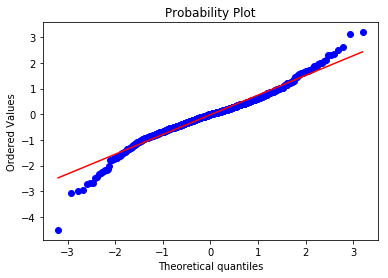

In [24]:
# Case 1: m=1000, n=1
get_plt(rej_algo(1000,1))

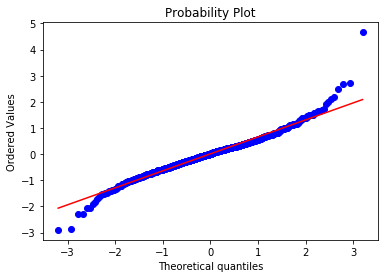

In [25]:
# Case 1: m=1000, n=3
get_plt(rej_algo(1000,3))

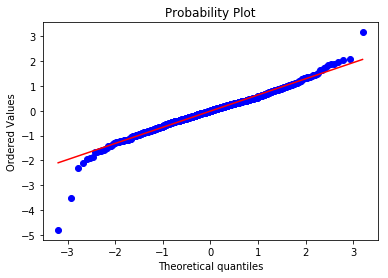

In [26]:
# Case 1: m=1000, n=5
get_plt(rej_algo(1000,5))

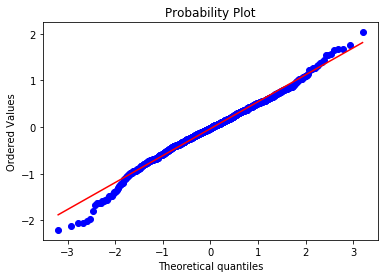

In [27]:
# Case 1: m=1000, n=10
get_plt(rej_algo(1000,10))

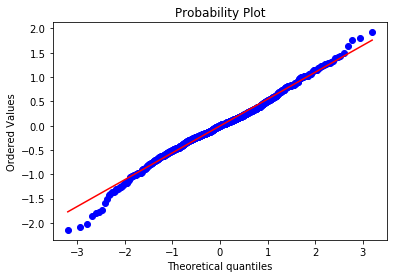

In [28]:
# Case 1: m=1000, n=30
get_plt(rej_algo(1000,30))